In [112]:
import pandas as pd
import datetime
import yfinance as yf
from matplotlib import pyplot as plt
import mplcyberpunk
import win32com.client as win32

In [113]:
#!pip install pywin32

In [114]:
codigos_de_negociacao = ["^BVSP", "BRL=X"]  

hoje = datetime.datetime.now()
um_ano_atras = hoje - datetime.timedelta(days = 365)

dados_mercado = yf.download(codigos_de_negociacao, um_ano_atras, hoje)

display(dados_mercado)

[*********************100%***********************]  2 of 2 completed


Adj Close                  Close                   High            \
               BRL=X          ^BVSP   BRL=X          ^BVSP   BRL=X     ^BVSP   
Date                                                                           
2022-02-07    5.3269  111996.000000  5.3269  111996.000000  5.3430  112517.0   
2022-02-08    5.2626  112234.000000  5.2626  112234.000000  5.2849  112251.0   
2022-02-09    5.2584  112461.000000  5.2584  112461.000000  5.2880  113163.0   
2022-02-10    5.2345  113359.000000  5.2345  113359.000000  5.2446  113812.0   
2022-02-11    5.2487  113572.000000  5.2487  113572.000000  5.2512  114899.0   
...              ...            ...     ...            ...     ...       ...   
2023-02-01    5.0722  112303.000000  5.0722  112303.000000  5.0868  113598.0   
2023-02-02    5.0535  109935.000000  5.0535  109935.000000  5.0545  112943.0   
2023-02-03    5.0492  108490.000000  5.0492  108490.000000  5.1347  110570.0   
2023-02-06    5.1498  108456.000000  5.1498  108456.000000  5.2060  108710.0   
2023-02-07       NaN  107829.726562     NaN  107829.726562     NaN  109037.0   

                 Low                   Open               Volume              
               BRL=X        ^BVSP     BRL=X         ^BVSP  BRL=X       ^BVSP  
Date                                                                          
2022-02-07  5.276800  111490.0000  5.326200  112247.00000    0.0  10672800.0  
2022-02-08  5.251000  110943.0000  5.262800  111995.00000    0.0  10157500.0  
2022-02-09  5.232774  111710.0000  5.256489  112233.00000    0.0  13794500.0  
2022-02-10  5.170000  112163.0000  5.231429  112462.00000    0.0  13267900.0  
2022-02-11  5.182800  113128.0000  5.248600  113368.00000    0.0  18602800.0  
...              ...          ...       ...           ...    ...         ...  
2023-02-01  5.047900  110729.0000  5.072200  113430.00000    0.0  17821500.0  
2023-02-02  4.941700  109747.0000  5.053500  112072.00000    0.0  15241800.0  
2023-02-03  5.046758  108185.0000  5.049200  110141.00000    0.0  13235300.0  
2023-02-06  5.147992  107416.0000  5.149800  108518.00000    0.0  11514600.0  
2023-02-07       NaN  107233.9375       NaN  108726.78125    NaN         0.0  

[262 rows x 12 columns]

In [115]:
dados_fechamento = dados_mercado['Adj Close']

dados_fechamento.columns = ['dolar', 'ibovespa']

dados_fechamento = dados_fechamento.dropna()

dados_fechamento

,dolar,ibovespa
Date,,
2022-02-07,5.3269,111996.0
2022-02-08,5.2626,112234.0
2022-02-09,5.2584,112461.0
2022-02-10,5.2345,113359.0
2022-02-11,5.2487,113572.0
...,...,...
2023-01-31,5.1149,113532.0
2023-02-01,5.0722,112303.0
2023-02-02,5.0535,109935.0


In [116]:
dados_anuais = dados_fechamento.resample("Y").last()

dados_mensais = dados_fechamento.resample("M").last()

dados_anuais

,dolar,ibovespa
Date,,
2022-12-31,5.2668,110031.0
2023-12-31,5.1498,108456.0


In [117]:
retorno_anual = dados_anuais.pct_change().dropna()
retorno_mensal = dados_mensais.pct_change().dropna()
retorno_diario = dados_fechamento.pct_change().dropna()

retorno_diario

,dolar,ibovespa
Date,,
2022-02-08,-0.012071,0.002125
2022-02-09,-0.000798,0.002023
2022-02-10,-0.004545,0.007985
2022-02-11,0.002713,0.001879
2022-02-14,0.000239,0.002069
...,...,...
2023-01-31,0.001508,0.014693
2023-02-01,-0.008348,-0.010825
2023-02-02,-0.003687,-0.021086


In [118]:
# retorno_jan_26_2022 = retorno_diario.loc['2022-01-26', 'dolar']
# retorno_jan_26_2022_iloc = retorno_diario.iloc[1, 0]

retorno_diario_dolar = retorno_diario.iloc[-1, 0]
retorno_diario_ibov = retorno_diario.iloc[-1, 1]

retorno_mensal_dolar = retorno_mensal.iloc[-1, 0]
retorno_mensal_ibov = retorno_mensal.iloc[-1, 1]

retorno_anual_dolar = retorno_anual.iloc[-1, 0]
retorno_anual_ibov = retorno_anual.iloc[-1, 1]

print(retorno_anual_dolar)
display(retorno_anual)

-0.022214647342575278


,dolar,ibovespa
Date,,
2023-12-31,-0.022215,-0.014314


In [119]:
retorno_diario_dolar = round((retorno_diario_dolar * 100), 2)
retorno_diario_ibov = round((retorno_diario_ibov * 100), 2)

retorno_mensal_dolar = round((retorno_mensal_dolar * 100), 2)
retorno_mensal_ibov = round((retorno_mensal_ibov * 100), 2) 

retorno_anual_dolar = round((retorno_anual_dolar * 100), 2)
retorno_anual_ibov = round((retorno_anual_ibov * 100), 2)

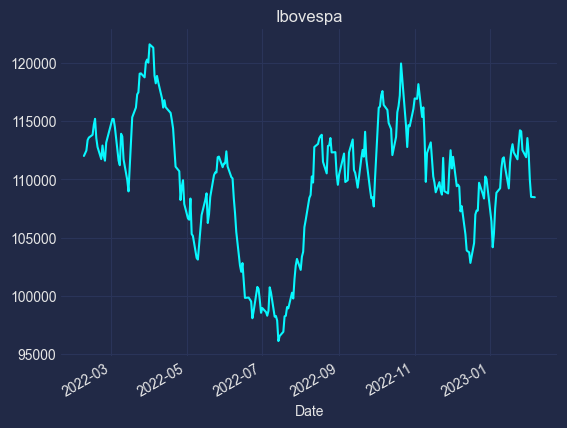

In [120]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y = "ibovespa", use_index = True, legend = False)

plt.title("Ibovespa")

plt.savefig('ibovespa.png', dpi = 300)

plt.show()

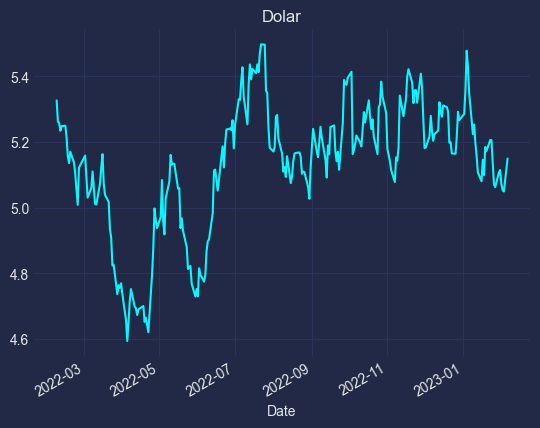

In [121]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y = "dolar", use_index = True, legend = False)

plt.title("Dolar")

plt.savefig('dolar.png', dpi = 300)

plt.show()

In [122]:
outlook = win32.Dispatch("outlook.application")

email = outlook.CreateItem(0)

In [123]:
emails = ['jaspioncr@gmail.com','carlosjunior.tec@outlook.com']
enviare = emails[0]
enviare

'jaspioncr@gmail.com'

In [124]:
email.To = enviare
email.Subject = "MXRF11 - RELATÓRIO DIÁRIO"
email.Body = f'''Prezados, segue o relatório diário:

IFIX:

No ano o Ibovespa está tendo uma rentabilidade de {retorno_anual_ibov}%, 
enquanto no mês a rentabilidade é de {retorno_mensal_ibov}%.

No último dia útil, o fechamento do Ibovespa foi de {retorno_diario_ibov}%.

MXRF11:

No ano o Dólar está tendo uma rentabilidade de {retorno_anual_dolar}%, 
enquanto no mês a rentabilidade é de {retorno_mensal_dolar}%.

No último dia útil, o fechamento do Dólar foi de {retorno_diario_dolar}%.


Abs,

O melhor estagiário do mundo

'''

anexo_ibovespa = r'C:\Users\admin\Desktop\SOFTWARE\MXRF\MXRF\ibovespa.png'
anexo_dolar = r'C:\Users\admin\Desktop\SOFTWARE\MXRF\MXRF\dolar.png'

email.Attachments.Add(anexo_ibovespa)
email.Attachments.Add(anexo_dolar)

email.Send()
